https://www.kaggle.com/datasets/vishalmane10/anime-dataset-2022

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
anime=pd.read_csv('anime.csv')

In [85]:
anime['Type']=anime['Type'].str.rstrip()
#delete white spaces for anime type column
anime.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


I created violinplot to see which type is the most produced according to years. 
So, as a result, we can see movies are the most released each year. 
This is logical since TV shows are generally long, and it is longer to develop, 
so TV show number is less than movies.

<AxesSubplot:xlabel='Type', ylabel='Release_year'>

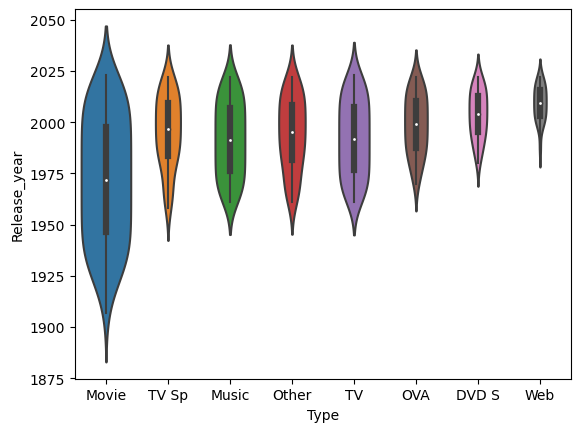

In [84]:
anime_types=anime.groupby(['Release_year','Type']).size().reset_index(name='Count')
anime_types['Release_year']=anime_types['Release_year'].astype(int)
#anime_types[anime_types['Type']=='TV']
fig,ax=plt.subplots()
sns.violinplot(x='Type',y='Release_year',data=anime_types,ax=ax,split=False,scale='count')

In [50]:
anime_counts=anime.groupby(['Studio','Release_year']).size().reset_index(name='Anime_produced')
anime_counts
#this produce a dataframe with studio name and number of anime it produced and release year.
studio_total=anime_counts.groupby('Studio')['Anime_produced'].sum().reset_index(name='Total anime')
#create a dataframe with total anime produced by each studio.
top_studio=studio_total.nlargest(10,'Total anime')
top_studio
#top 10 studio all time with most amount of anime produced.

,Studio,Total anime
640,Toei Animation,733
604,Sunrise,470
250,J.C.Staff,382
615,TMS Entertainment,364
311,MADHOUSE,355
417,Production I.G,279
524,Studio DEEN,278
462,Shanghai Animation Film Studio,250
359,OLM,249
403,Pierrot,240


Scatter plot of top 10 anime producers according to anime produced and released year.

<AxesSubplot:xlabel='Release_year', ylabel='Studio'>

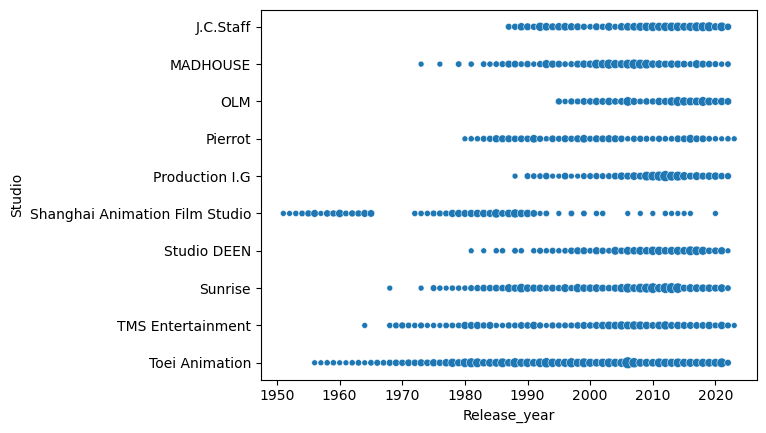

In [19]:
anime_count_top_10=anime_counts[anime_counts['Studio'].isin(top_studio['Studio'])]
#filter the top 10 studio from anime_counts data.
sns.scatterplot(y='Studio',x='Release_year',size='Anime_produced',data=anime_count_top_10,legend=False)
#scatter plot of those top 10 anime studios.

We can see that Toei Animation and Shanghai Animation Studio produced the lot of anime movies.

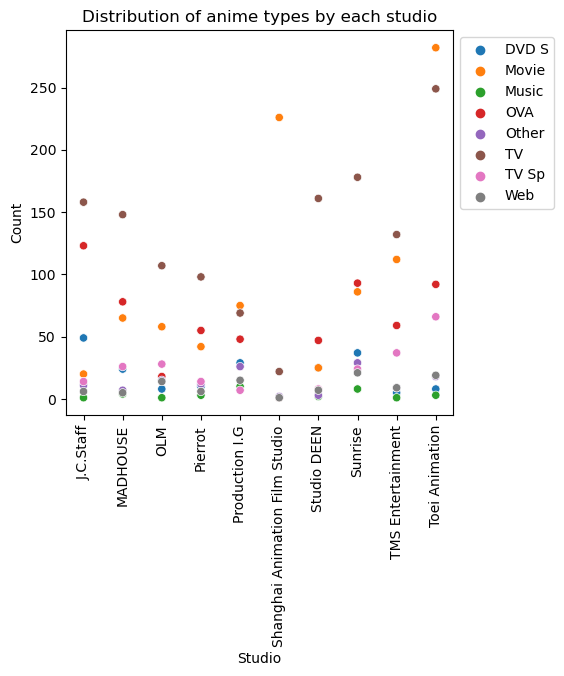

In [90]:
top_10_studio=anime[anime['Studio'].isin(top_studio['Studio'])]
#filter top 10 studio from anime dataset.
type_counts=top_10_studio.groupby(['Studio','Type']).size().reset_index(name='Count')
#group them with type of anime they produced.
fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(x='Studio',y='Count',hue='Type',data=type_counts,ax=ax)
plt.xticks(rotation=90)
plt.title('Distribution of anime types by each studio')
plt.legend(bbox_to_anchor=(1,1))

This is analysis of top 10 producer with the most number of high ranked animes produced. Bones and Kyoto Animation studios are two studios with less quantity of animes but of high quality. Meanwhile, most of the animes produced by Toei Animation are of average rank.

Text(0.5, 1.0, 'Distribution of top 10 studio with most high ranked animes')

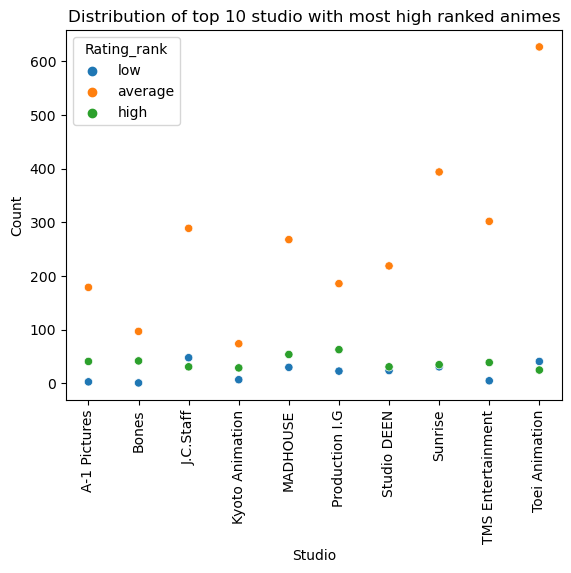

In [121]:
bins=[0,3,4,5]
labels=['low','average','high']
anime['Rating_rank']=pd.cut(anime['Rating'],bins=bins,labels=labels)
anime.dropna(subset='Rating_rank')
#create rating rank column.
#between 5 and 4 is high, between 3 and 4.5 is average and below 3 is low. 
studio_and_rating=anime.groupby(['Studio','Rating_rank']).size().reset_index(name='Count')
high_ranked=studio_and_rating[studio_and_rating['Rating_rank']=='high']
sorted_high_ranked=high_ranked.sort_values('Count',ascending=False)
top_studio_of_high_ranked_anime=sorted_high_ranked.head(10)
#top 10 studio with most high ranked animes
top_studio_of_high_ranked_anime=studio_and_rating[studio_and_rating['Studio'].isin(top_studio_of_high_ranked_anime['Studio'])]
sns.scatterplot(data=top_studio_of_high_ranked_anime,x='Studio',y='Count',hue='Rating_rank')
plt.xticks(rotation=90)
plt.title('Distribution of top 10 studio with most high ranked animes')